# 矩阵的应用

## 矩阵表示变换

### 旋转

若

$$
T \cdot\left(\begin{array}{c}
x \\
y
\end{array}\right) = \left(\begin{array}{c}
\cos \theta \cdot x+\sin \theta \cdot y \\
-\sin \theta \cdot x+\cos \theta \cdot y
\end{array}\right)
$$

则有$T$：

$$
T=\left(\begin{array}{cc}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta
\end{array}\right)
$$

In [2]:
import math

import matplotlib.pyplot as plt
from src.matrix import Matrix
from src.vector import Vector

In [5]:
points = [
    [0, 0],
    [0, 5],
    [3, 5],
    [3, 4],
    [1, 4],
    [1, 3],
    [2, 3],
    [2, 2],
    [1, 2],
    [1, 0],
]

In [6]:
x = [point[0] for point in points]
y = [point[1] for point in points]

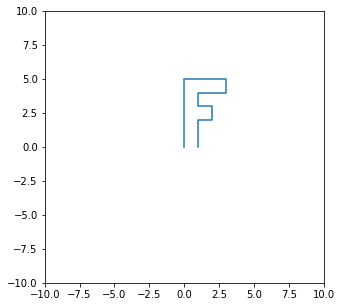

In [10]:
# 图像绘制
plt.figure(figsize=(5, 5))
# 定义 x,y 轴范围
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.plot(x, y)
plt.show()

In [11]:
P = Matrix(points)
P

Matrix([[0, 0], [0, 5], [3, 5], [3, 4], [1, 4], [1, 3], [2, 3], [2, 2], [1, 2], [1, 0]])

In [13]:
P.shape()

(10, 2)

In [16]:
P.T()

Matrix([[0, 0, 3, 3, 1, 1, 2, 2, 1, 1], [0, 5, 5, 4, 4, 3, 3, 2, 2, 0]])

In [33]:
# T * P 表示
# 横坐标扩大两倍，纵坐标扩大1.5倍
T = Matrix([[2, 0], [0, 1.5]])
# 逆时针旋转90度
theta = math.pi / -2
T = Matrix([[math.cos(theta), math.sin(theta)], [-math.sin(theta), math.cos(theta)]])

In [34]:
P2 = T.dot(P.T())

In [35]:
P2

Matrix([[0.0, -5.0, -5.0, -4.0, -4.0, -3.0, -3.0, -1.9999999999999998, -2.0, 6.123233995736766e-17], [0.0, 3.061616997868383e-16, 3.0000000000000004, 3.0000000000000004, 1.0000000000000002, 1.0000000000000002, 2.0, 2.0, 1.0000000000000002, 1.0]])

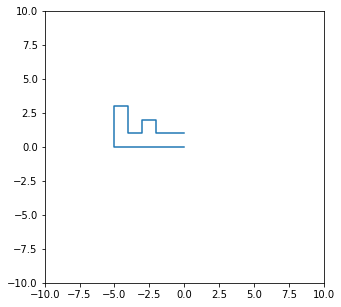

In [36]:
# 图像绘制
plt.figure(figsize=(5, 5))
# 定义 x,y 轴范围
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.plot(
    [P2.col_vector(i)[0] for i in range(P2.col_num())],
    [P2.col_vector(i)[1] for i in range(P2.col_num())],
)
plt.show()

## 单位矩阵

当$T$等于：

$$
T=\left(\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right) 
$$

有：

$$
\quad T \cdot\left(\begin{array}{l}
x \\
y
\end{array}\right)=\left(\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right) \cdot\left(\begin{array}{l}
x \\
y
\end{array}\right)=\left(\begin{array}{l}
x \\
y
\end{array}\right)
$$

则称之为单位矩阵，一般表示如下：

$$
I_{2}=\left(\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right)
$$

主对角线为`1`，其余为`0`，表示如下：

$$
I_{n}=\left(i_{k j}\right)\left\{\begin{array}{lll}
1 & \text { if } & k=j \\
0 & \text { if } & k \neq j
\end{array}\right.
$$

单位矩阵一定是方阵（矩阵的行数等于列数）。

In [51]:
I = Matrix.identity(2)
I

Matrix([[1, 0], [0, 1]])

In [52]:
A = Matrix([[0, -1], [1, 0]])
A

Matrix([[0, -1], [1, 0]])

In [53]:
A.dot(I)

Matrix([[0, -1], [1, 0]])

In [54]:
I.dot(A)

Matrix([[0, -1], [1, 0]])

## 矩阵的逆

### 逆矩阵

矩阵中，如果$AB = BA = I$，则称$B$是$A$的逆矩阵，记作：$B = A^{-1}$，$A$称为可逆矩阵，或者叫非奇异矩阵(non-singular)，反之为奇异矩阵(singular)。

In [40]:
# 尝试使用NumPy
import numpy as np

In [45]:
I = np.identity(2)
A = np.array([[1, 2], [3, 4]])
I

array([[1., 0.],
       [0., 1.]])

In [46]:
A.dot(I)

array([[1., 2.],
       [3., 4.]])

In [47]:
invA = np.linalg.inv(A)

invA

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [48]:
invA.dot(A)

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

In [49]:
A.dot(invA)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

### 矩阵的逆的性质

如下：
- $\left(A^{-1}\right)^{-1}=A$
- $(A \cdot B)^{-1}=B^{-1} A^{-1}$
- $\left(A^{T}\right)^{-1}=\left(A^{-1}\right)^{T}$

## 总结

看待矩阵的四个视角：

- 数据角度：数据表
- 线性系统：方程组
- 变换（向量的函数）：$T \cdot \vec{a}=\vec{b}$
- 空间：用矩阵表示空间
